In [1]:
import tqdm
import numpy as np
import scipy.stats
import pandas as pd
import sklearn
import sklearn.covariance
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)
import plotly
plotly.offline.init_notebook_mode(connected=True)

import kliep

## Multivariate Gaussian 1

In [2]:
tmis = [-0.5 * np.log(1 - c**2) for c in np.arange(0, 1, 0.1)]

In [3]:
mis = []
for c in tqdm.tqdm(np.arange(0, 1, 0.1)):
    cov = np.array([[1, c], [c, 1]])
    XY = scipy.stats.multivariate_normal(mean=[0, 0], cov=cov).rvs(1000)
    X, Y = np.split(XY, [1], axis=1)
    mis += [kliep.mutual_information(X, Y, sigma=0.5)]

100%|██████████| 10/10 [00:05<00:00,  1.64it/s]


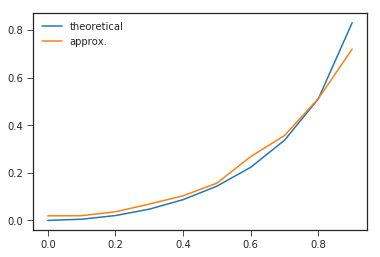

In [4]:
plt.plot(np.arange(0, 1, 0.1), tmis, label='theoretical')
plt.plot(np.arange(0, 1, 0.1), mis, label='approx.')
plt.legend()

## Multivariate Gaussian 2

In [31]:
pre = [[1,   0.8,    0],
       [0.8,   1, -0.4],
       [0,  -0.4,    1]]
cov = np.linalg.inv(pre)
diag = np.sqrt(np.diag(cov))
cov = cov / diag.reshape(-1, 1) / diag.reshape(1, -1)
X = scipy.stats.multivariate_normal(mean=[0, 0, 0], cov=cov).rvs(3000)

[[  4.20000000e+00   3.66606056e+00  -1.55431223e-15]
 [  3.66606056e+00   5.00000000e+00  -1.20000000e+00]
 [ -1.99840144e-16  -1.20000000e+00   1.80000000e+00]]
[[ 1.         -0.87287156 -0.58191437]
 [-0.87287156  1.          0.66666667]
 [-0.58191437  0.66666667  1.        ]]


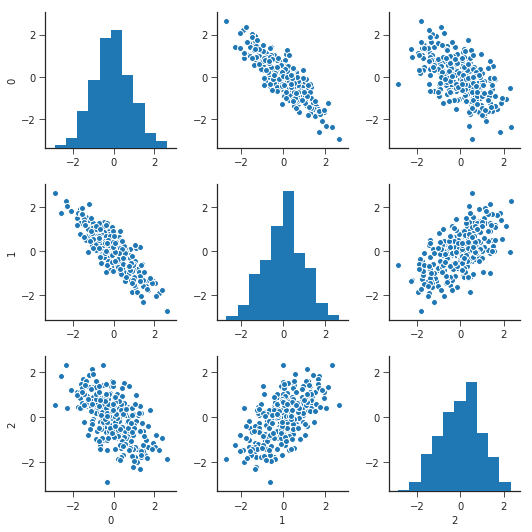

In [32]:
sns.pairplot(pd.DataFrame(X).sample(300))
plt.tight_layout()
plt.savefig('output/pair-gaussian.pdf', format='pdf')

In [35]:
pre = sklearn.covariance.GraphLassoCV().fit(X).precision_
mi = kliep.calc_mi_matrix(X)
cmi = kliep.calc_cmi_matrix(X)

100%|██████████| 3/3 [00:10<00:00,  3.31s/it]


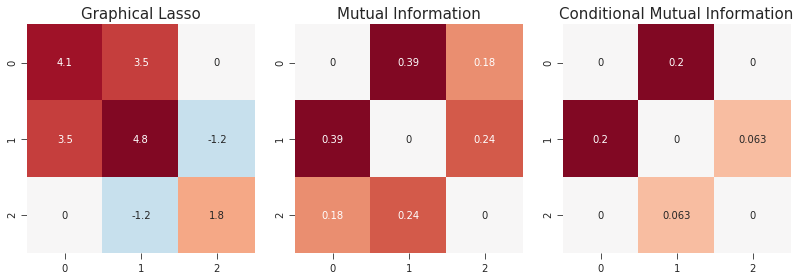

In [36]:
f, axes = plt.subplots(1, 3, figsize=[11.5, 4])
axes[0].set_title('Graphical Lasso', fontsize=15)
axes[1].set_title('Mutual Information', fontsize=15)
axes[2].set_title('Conditional Mutual Information', fontsize=15)
sns.heatmap(pre, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False)
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, cmap=palette, cbar=False)
plt.tight_layout()
plt.savefig('output/heat-gaussian.pdf', format='pdf')

## Multivariate Gaussian Mixuture

In [37]:
X1 = scipy.stats.multivariate_normal(mean=[-4,  0,  0], cov=np.eye(3)).rvs(500)
X2 = scipy.stats.multivariate_normal(mean=[+4,  0,  0], cov=[[1, 0, 0], [0, 6, 0], [0, 0, 1]]).rvs(500)
X = np.vstack([X1, X2])
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X.shape

(1000, 3)

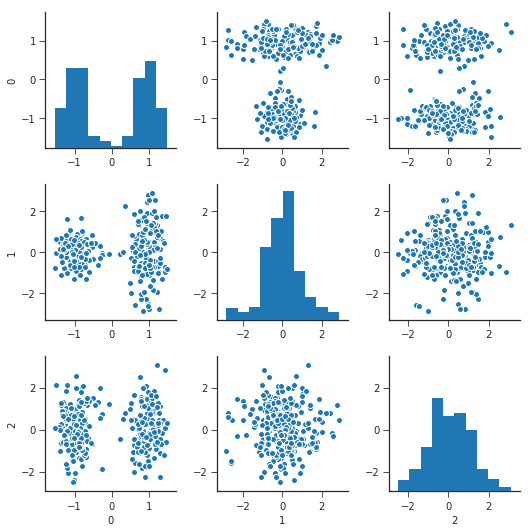

In [38]:
sns.pairplot(pd.DataFrame(X).sample(300))
plt.tight_layout()
plt.savefig('output/pair-gaussian-mixture.pdf', format='pdf')

In [ ]:
pre = sklearn.covariance.GraphLasso(alpha=0.02).fit(X).precision_
mi = kliep.calc_mi_matrix(X)
cmi = kliep.calc_cmi_matrix(X)

In [ ]:
f, axes = plt.subplots(1, 3, figsize=[11.5, 4])
axes[0].set_title('Graphical Lasso', fontsize=15)
axes[1].set_title('Mutual Information', fontsize=15)
axes[2].set_title('Conditional Mutual Information', fontsize=15)
sns.heatmap(pre, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False)
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, cmap=palette, cbar=False)
plt.tight_layout()
plt.savefig('output/heat-gaussian-mixture.pdf', format='pdf')